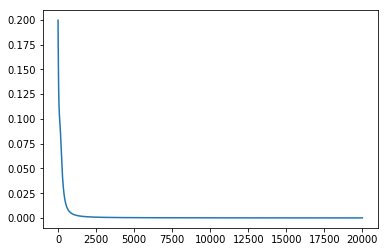

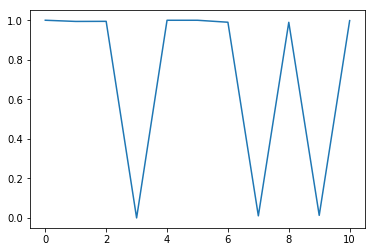

Final Syn1:
[[ -3.10086555]
 [  6.039693  ]
 [ -9.56786085]
 [  2.13258226]
 [-11.62769781]
 [ -5.21602298]
 [ -5.55301311]
 [ -2.35601808]
 [  4.60554509]
 [  3.05017331]]
Final syn0:
[[ 1.29692577  1.84908123 -2.32587527 -0.03870615  4.62212772  0.42249125
  -1.02290779  1.40574589  1.43388461 -1.49709916]
 [ 1.70101311 -3.38006992  4.71534583  0.32794021 -8.15340951 -1.16653294
   1.51239816  1.51001698 -2.33264697  2.91052274]
 [ 1.61852371  4.77621735 -6.58989231  0.56823143  0.56411406  0.05950614
  -2.47688876  1.32114808  3.43211509 -0.28332715]]


In [140]:
#========================================================
# Training program with back propagration to train MLP
#========================================================

import numpy as np
import matplotlib.pyplot as plt

# Variable Declaration

inp = np.array([
    [3,3,2],
    [3,2,2],
    [3,2,1],
    [3,1,1],
    [2,3,2],
    [2,2,2],
    [2,2,1],
    [2,1,1],
    [1,3,2],
    [1,2,1],
    [1,1,2]
])


out = np.array([
    [1,1,1,0,1,1,1,0,1,0,1]
]).T

total_input = len(inp[:,1]) # Number of all input nodes (11)
node_input = len(inp[1,:]) # Dimension of training pattern (3)
neuron_output = len(out[1,:]) # Dimension of output neurons (1)

neuron_hidden = 10 # Dimension of hidden neurons
learning_rate = 0.5 # alpha, learning rate
Epoch = 20000 # maximum iteration
MaxMSE = 10^-5 # maximum mean square error

# deterministic random(just a good practice)
np.random.seed(0)

#================================================================
# Declare the weights (W1) between input layer and Hidden Layer randomly
# in interval -1 through +1
#================================================================

W1 = np.random.random((node_input, neuron_hidden))*2-1

#================================================================
# Declare the weights (W1) between Hidden Layer and Output layer randomly
# in interval -1 through +1
#================================================================

W2 = np.random.random((neuron_hidden, neuron_output))*2-1

MSEepoch = MaxMSE + 1 # Mean Square Error for 1 epoch
MSE = [] # all MSE list
ee = 1   # index epoch

# sigmoid function, gives a value between 0 - 1
def sig(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

#=================================================================
# Start training
#=================================================================

while( ee <= Epoch) and ( MSEepoch > MaxMSE):
    MSEepoch = 0

    l0 = inp                                   # Assign input to first layer
    l1 = sig(np.dot(l0, W1))                   # Summing function: 3 input nodes and 3 weights with number of hidden weights
    l2 = sig(np.dot(l1, W2))                   # Summing function: output hidden layer with number of output weights 
    
    l2_error = out - l2                        # Error: actual output - training output in output layer
    MSEepoch += np.sum(l2_error**2)            # MSE per epoch
    
    l2_delta = l2_error*sig(l2,deriv=True)     # Update confidence prediction with delta
    l2_dw = l1.T.dot(l2_delta*learning_rate)   # multipy it with the result of hidden layer and learning rate
    
    l1_error = l2_delta.dot(W2.T)

    l1_delta = l1_error * sig(l1,deriv=True)
    l1_dw = l0.T.dot(l1_delta*learning_rate)
    
    W2 += l2_dw
    W1 += l1_dw
    
    MSE.append(MSEepoch/total_input)
    ee+=1

plt.plot(MSE)
plt.show()
plt.plot(l2)
plt.show()
print "Final Syn1:"
print W2
print "Final syn0:"
print W1

In [145]:
#=====================================================================
# Test set
#=====================================================================

inp_test = np.array([
    [3,3,1],
    [3,1,2],
    [2,3,1],
    [2,1,2],
    [1,3,1],
    [1,2,2],
    [1,1,1]
])


out_test = np.array([
    [0,1,0,1,0,1,0]
]).T

total_inp_test = len(inp_test[:,1])
total_match = 0;

for pp in xrange(total_inp_test):

    l0 = inp_test[pp,:]
    l1 = sig(np.dot(l0, W1))
    l2 = sig(np.dot(l1, W2))
    
    print l2
    
    if l2 < 0.5:
        cat = 0
    else:
        cat = 1
        
    if cat == out_test[pp]:
        total_match += 1
    
print 'Total match: ' + str(total_match)
print 'Total input test: ' + str(total_inp_test)
print 'Accuracy: ' + str((total_match / float(total_inp_test))*100) + ' %'

[ 0.07727664]
[ 0.00066393]
[  2.97370825e-05]
[ 0.00728998]
[  9.59749790e-07]
[ 0.99984475]
[ 0.99532876]
Total match: 4
Total input test: 7
Accuracy: 57.1428571429 %
